In [56]:
def get_plot_array(o, name):
    return [group[name] for group in o["reports"]]

In [78]:
from train_utils import *
results = {}

demo_params = {
    "num_units": "16,16",
    "activation_func": "Tanh",
    "batch_size": 32,
    "num_epochs": 100,
    "learning_rate": 1e-2,
    "momentum": 0.9,
    "test_ratio": 0.2,
    
    "input_data": "./data/BreastCancer.data",
    "loss_func": "log_binary_loss",
    # "l2_norm": 0.1
    "l2_norm": 5e-3,
    "log_step": 10
}
# demo_params

results["Classification_Tanh"] = train_func(**demo_params)

(455, 31) (114, 31)
Epoch 0
train_loss: [[0.83216804]]
test_loss: [[0.82376941]]
Epoch 10
train_loss: [[0.33377509]]
test_loss: [[0.31841038]]
Epoch 20
train_loss: [[0.22995345]]
test_loss: [[0.23211075]]
Epoch 30
train_loss: [[0.18893048]]
test_loss: [[0.19602746]]
Epoch 40
train_loss: [[0.16705921]]
test_loss: [[0.17625487]]
Epoch 50
train_loss: [[0.15348082]]
test_loss: [[0.16384114]]
Epoch 60
train_loss: [[0.14389998]]
test_loss: [[0.1552345]]
Epoch 70
train_loss: [[0.13670216]]
test_loss: [[0.14853094]]
Epoch 80
train_loss: [[0.13103481]]
test_loss: [[0.14277388]]
Epoch 90
train_loss: [[0.1263064]]
test_loss: [[0.13778191]]


In [2]:
demo_params = {
    "num_units": "16,16",
    "activation_func": "Sigmoid",
    "batch_size": 32,
    "num_epochs": 100,
    "learning_rate": 1e-2,
    "momentum": 0.9,
    "test_ratio": 0.2,
    
    "input_data": "./data/BreastCancer.data",
    "loss_func": "log_binary_loss",
    # "l2_norm": 0.1
    "l2_norm": 5e-3,
    "log_step": 10
}
results["Classification_Sigmoid"] = train_func(**demo_params)


(455, 31) (114, 31)
Epoch 0
train_loss: [[1.0669882]]
test_loss: [[0.60846891]]
Epoch 10
train_loss: [[0.42961274]]
test_loss: [[0.37358831]]
Epoch 20
train_loss: [[0.32176568]]
test_loss: [[0.30512726]]
Epoch 30
train_loss: [[0.26223355]]
test_loss: [[0.25508768]]
Epoch 40
train_loss: [[0.22424931]]
test_loss: [[0.22212942]]
Epoch 50
train_loss: [[0.19780513]]
test_loss: [[0.20002689]]
Epoch 60
train_loss: [[0.17841499]]
test_loss: [[0.18299464]]
Epoch 70
train_loss: [[0.16350741]]
test_loss: [[0.16984351]]
Epoch 80
train_loss: [[0.1516384]]
test_loss: [[0.16063922]]
Epoch 90
train_loss: [[0.14184881]]
test_loss: [[0.15265082]]


In [18]:
import seaborn as sns

epochs = [o["epoch"] for o in results["Classification_Sigmoid"]["reports"]]
train_loss = [o["train_loss"] for o in results["Classification_Sigmoid"]["reports"]]
test_loss = [o["test_loss"] for o in results["Classification_Sigmoid"]["reports"]]


train_loss_2 = [o["train_loss"] for o in results["Classification_Tanh"]["reports"]]
test_loss_2 = [o["test_loss"] for o in results["Classification_Tanh"]["reports"]]
l2_loss = [o["l2_loss"] for o in results["Classification_Tanh"]["reports"]]


In [21]:
import pandas as pd

data = pd.DataFrame({"epochs": epochs, "train_loss": train_loss, "test_loss": test_loss, "train_loss_2":train_loss_2, "test_loss_2": test_loss_2, "l2_loss": l2_loss})

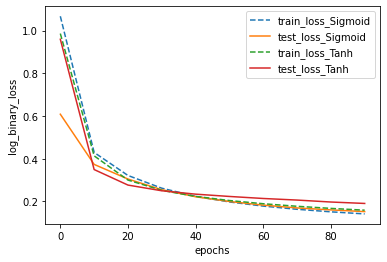

In [37]:
import matplotlib.pyplot as plt

fig = sns.lineplot(data=data, x="epochs", y="train_loss", legend="auto", label="train_loss_Sigmoid", linestyle="--")
sns.lineplot(data=data, x="epochs", y="test_loss", legend="auto", label="test_loss_Sigmoid")

sns.lineplot(data=data, x="epochs", y="train_loss_2", legend="auto", label="train_loss_Tanh", linestyle="--")
sns.lineplot(data=data, x="epochs", y="test_loss_2", legend="auto", label="test_loss_Tanh")

plt.xlabel("epochs")
plt.ylabel("log_binary_loss")

# sns.lineplot(x=epochs, y=test_loss)

plt.savefig("Active_Function.png")

In [ ]:
import matplotlib.pyplot as plt

fig = sns.lineplot(data=data, x="epochs", y="train_loss", legend="auto", label="train_loss_Sigmoid", linestyle="--")
sns.lineplot(data=data, x="epochs", y="test_loss", legend="auto", label="test_loss_Sigmoid")

sns.lineplot(data=data, x="epochs", y="train_loss_2", legend="auto", label="train_loss_Tanh", linestyle="--")
sns.lineplot(data=data, x="epochs", y="test_loss_2", legend="auto", label="test_loss_Tanh")

plt.xlabel("epochs")
plt.ylabel("log_binary_loss")

# sns.lineplot(x=epochs, y=test_loss)

plt.savefig("Active_Function.png")

In [4]:
result["reports"][0]

{'epoch': 0,
 'train_loss': 1.5074295974530283,
 'l2_loss': 1.5074295974530283,
 'test_loss': 0.8671053649841365}

In [51]:
y1

[1.457880110907106,
 0.6486197924746662,
 0.627814111759381,
 0.6015606210087241,
 0.5671675304347844,
 0.5240174834050288,
 0.47398138358973496,
 0.4206213204807165,
 0.36870587521059206,
 0.32246224615313707]

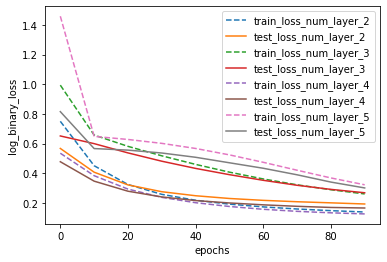

In [63]:
# epochs = get_plot_array(results["Classification_Sigmoid_%s"% (2+1)], "epoch")
# df = pd.DataFrame({"epoch": epochs})
epochs = get_plot_array(results["Classification_Sigmoid_%s"% (2+1)], "epoch")
df = pd.DataFrame({"epoch": epochs})
for i in range(2,6):
    o = results["Classification_Sigmoid_%s"% (i+1)]
    x = get_plot_array(o, "epoch")
    y1 = get_plot_array(o, "train_loss")
    y2 = get_plot_array(o, "test_loss")
    
    sns.lineplot(x=x, y=y1, legend="auto", label="train_loss_num_layer_%s" % i, linestyle="--")
    sns.lineplot(x=x, y=y2, legend="auto", label="test_loss_num_layer_%s" % i)

plt.xlabel("epochs")
plt.ylabel("log_binary_loss")
plt.savefig("figs/classfication/num_layer_with_epoch.png")

2
(455, 31) (114, 31)
Epoch 0
train_loss: [[1.71611632]]
test_loss: [[0.97349213]]
Epoch 99
train_loss: [[0.13124474]]
test_loss: [[0.17522394]]
3
(455, 31) (114, 31)
Epoch 0
train_loss: [[0.82011471]]
test_loss: [[0.56717878]]
Epoch 99
train_loss: [[0.17888348]]
test_loss: [[0.18523654]]
4
(455, 31) (114, 31)
Epoch 0
train_loss: [[0.68878247]]
test_loss: [[0.59656284]]
Epoch 99
train_loss: [[0.12615425]]
test_loss: [[0.14438431]]
5
(455, 31) (114, 31)
Epoch 0
train_loss: [[0.83197791]]
test_loss: [[0.99682848]]
Epoch 99
train_loss: [[0.2182736]]
test_loss: [[0.18733014]]
6
(455, 31) (114, 31)
Epoch 0
train_loss: [[0.69675142]]
test_loss: [[0.76248546]]
Epoch 99
train_loss: [[0.16334655]]
test_loss: [[0.21426895]]
7
(455, 31) (114, 31)
Epoch 0
train_loss: [[0.78545326]]
test_loss: [[0.51716957]]
Epoch 99
train_loss: [[0.15897442]]
test_loss: [[0.15017394]]
8
(455, 31) (114, 31)
Epoch 0
train_loss: [[0.90707669]]
test_loss: [[1.08858206]]
Epoch 99
train_loss: [[0.65825775]]
test_loss: [

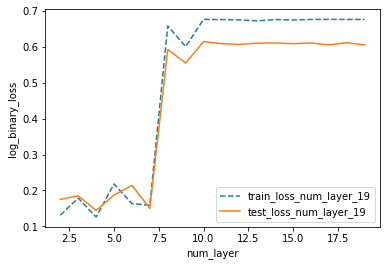

In [76]:
results = {}
for i in range(2,20):
    print(i)
    demo_params = {
        "num_units": ",".join(["20" for j in range(i)]),
        "activation_func": "Sigmoid",
        "batch_size": 32,
        "num_epochs": 100,
        "learning_rate": 1e-2,
        "momentum": 0.9,
        "test_ratio": 0.2,

        "input_data": "./data/BreastCancer.data",
        "loss_func": "log_binary_loss",
        # "l2_norm": 0.1
        "l2_norm": 5e-3,
        "log_step": 99
    }
    o = train_func(**demo_params)
    results["Classification_Sigmoid_%s"% (i+1)]  = o
    
    # sns.lineplot(x=get_plot_array(o, "data"), y="train_loss", legend="auto", label="train_loss_Sigmoid", linestyle="--")


epochs = get_plot_array(results["Classification_Sigmoid_%s"% (2+1)], "epoch")
df = pd.DataFrame({"epoch": epochs})
x = []
y1 = []
y2 = []
for i in range(2,20):
    o = results["Classification_Sigmoid_%s"% (i+1)]
    x.append(i)
    # x = get_plot_array(o, "epoch")
    y1.append(get_plot_array(o, "train_loss")[-1])
    y2.append(get_plot_array(o, "test_loss")[-1])
    
sns.lineplot(x=x, y=y1, legend="auto", label="train_loss_num_layer_%s" % i, linestyle="--")
sns.lineplot(x=x, y=y2, legend="auto", label="test_loss_num_layer_%s" % i)

plt.xlabel("num_layer")
plt.ylabel("log_binary_loss")
plt.savefig("figs/classfication/num_layer.png")

In [71]:
list(range(8, 8*20, 20))

[8, 28, 48, 68, 88, 108, 128, 148]

8
(455, 31) (114, 31)
Epoch 0
train_loss: [[1.0142635]]
test_loss: [[0.62858085]]
Epoch 99
train_loss: [[0.23373953]]
test_loss: [[0.25392533]]
16
(455, 31) (114, 31)
Epoch 0
train_loss: [[1.07083485]]
test_loss: [[1.43412206]]
Epoch 99
train_loss: [[0.13365773]]
test_loss: [[0.12596194]]
24
(455, 31) (114, 31)
Epoch 0
train_loss: [[0.82688727]]
test_loss: [[1.00306345]]
Epoch 99
train_loss: [[0.13718473]]
test_loss: [[0.13987913]]
32
(455, 31) (114, 31)
Epoch 0
train_loss: [[1.31654684]]
test_loss: [[0.90759366]]
Epoch 99
train_loss: [[0.09983662]]
test_loss: [[0.16058641]]
40
(455, 31) (114, 31)
Epoch 0
train_loss: [[0.64182987]]
test_loss: [[0.61506741]]
Epoch 99
train_loss: [[0.10610658]]
test_loss: [[0.16221289]]
48
(455, 31) (114, 31)
Epoch 0
train_loss: [[2.27676582]]
test_loss: [[2.42354499]]
Epoch 99
train_loss: [[0.07537279]]
test_loss: [[0.1280871]]
56
(455, 31) (114, 31)
Epoch 0
train_loss: [[0.83019911]]
test_loss: [[0.88007728]]
Epoch 99
train_loss: [[0.0961422]]
test_los

8
(455, 31) (114, 31)
Epoch 0
train_loss: [[0.76887684]]
test_loss: [[0.7583118]]
Epoch 99
train_loss: [[0.21865634]]
test_loss: [[0.22018455]]
16
(455, 31) (114, 31)
Epoch 0
train_loss: [[0.73566687]]
test_loss: [[0.89025779]]
Epoch 99
train_loss: [[0.21226367]]
test_loss: [[0.23717983]]
24
(455, 31) (114, 31)
Epoch 0
train_loss: [[2.52972087]]
test_loss: [[2.52652382]]
Epoch 99
train_loss: [[0.1180224]]
test_loss: [[0.11544866]]
32
(455, 31) (114, 31)
Epoch 0
train_loss: [[0.6221698]]
test_loss: [[0.5318932]]
Epoch 99
train_loss: [[0.09693782]]
test_loss: [[0.1732992]]
40
(455, 31) (114, 31)
Epoch 0
train_loss: [[1.00140991]]
test_loss: [[1.20687259]]
Epoch 99
train_loss: [[0.0882893]]
test_loss: [[0.14644049]]
48
(455, 31) (114, 31)
Epoch 0
train_loss: [[1.05967593]]
test_loss: [[0.9401658]]
Epoch 99
train_loss: [[0.07414387]]
test_loss: [[0.13139464]]
56
(455, 31) (114, 31)
Epoch 0
train_loss: [[0.85791195]]
test_loss: [[1.29717124]]
Epoch 99
train_loss: [[0.08026129]]
test_loss: [

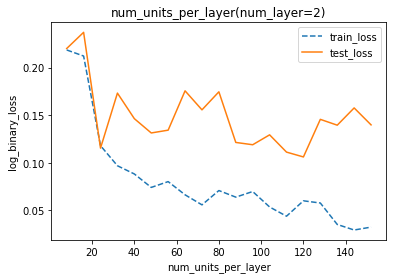

In [77]:

results = {}
for i in range(8, 8*20, 8):
    print(i)
    demo_params = {
        "num_units": "%d,%d"%(i,i),
        "activation_func": "Sigmoid",
        "batch_size": 32,
        "num_epochs": 100,
        "learning_rate": 1e-2,
        "momentum": 0.9,
        "test_ratio": 0.2,

        "input_data": "./data/BreastCancer.data",
        "loss_func": "log_binary_loss",
        # "l2_norm": 0.1
        "l2_norm": 5e-3,
        "log_step": 99
    }
    o = train_func(**demo_params)
    results["Classification_Sigmoid_%s"% (i+1)]  = o
    
    # sns.lineplot(x=get_plot_array(o, "data"), y="train_loss", legend="auto", label="train_loss_Sigmoid", linestyle="--")

# epochs = get_plot_array(results["Classification_Sigmoid_%s"% (2+1)], "epoch")
# df = pd.DataFrame({"epoch": epochs})
x = []
y1 = []
y2 = []
for i in range(8, 8*20, 8):
    o = results["Classification_Sigmoid_%s"% (i+1)]
    x.append(i)
    # x = get_plot_array(o, "epoch")
    y1.append(get_plot_array(o, "train_loss")[-1])
    y2.append(get_plot_array(o, "test_loss")[-1])
    
sns.lineplot(x=x, y=y1, legend="auto", label="train_loss", linestyle="--")
sns.lineplot(x=x, y=y2, legend="auto", label="test_loss")

plt.title("num_units_per_layer(num_layer=2)")
plt.xlabel("num_units_per_layer")
plt.ylabel("log_binary_loss")
plt.savefig("figs/classfication/num_units_per_layer.png")

In [55]:
results["Classification_Sigmoid_%s"% (i+1)]

{'params': {'num_units': '16,16,16,16,16',
  'activation_func': 'Sigmoid',
  'batch_size': 32,
  'num_epochs': 100,
  'learning_rate': 0.01,
  'momentum': 0.9,
  'test_ratio': 0.2,
  'input_data': './data/BreastCancer.data',
  'loss_func': 'log_binary_loss',
  'l2_norm': 0.005,
  'log_step': 10},
 'reports': [{'epoch': 0,
   'train_loss': 1.457880110907106,
   'l2_loss': 1.457880110907106,
   'test_loss': 0.8152280805828483},
  {'epoch': 10,
   'train_loss': 0.6486197924746662,
   'l2_loss': 0.6486197924746662,
   'test_loss': 0.5664663982342124},
  {'epoch': 20,
   'train_loss': 0.627814111759381,
   'l2_loss': 0.627814111759381,
   'test_loss': 0.5560117263663068},
  {'epoch': 30,
   'train_loss': 0.6015606210087241,
   'l2_loss': 0.6015606210087241,
   'test_loss': 0.5365908750657203},
  {'epoch': 40,
   'train_loss': 0.5671675304347844,
   'l2_loss': 0.5671675304347844,
   'test_loss': 0.5077917415491481},
  {'epoch': 50,
   'train_loss': 0.5240174834050288,
   'l2_loss': 0.5240174

In [54]:
epochs

[0.7499831544004528,
 0.4509082074216771,
 0.32446293593315645,
 0.258106661366169,
 0.21835747052330862,
 0.192155019478655,
 0.17350172210228315,
 0.15941361970296034,
 0.1482505761950304,
 0.13922763389394102]

In [41]:
results.keys()

dict_keys(['Classification_Tanh', 'Classification_Sigmoid', 'Classification_Sigmoid_3', 'Classification_Sigmoid_4', 'Classification_Sigmoid_5', 'Classification_Sigmoid_6'])